In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

print("Libraries successfully loaded, warnings not to appear!")

Libraries successfully loaded, warnings not to appear!


In [2]:
df = pd.read_excel('merged-data-COMBINED.xlsx')
df.shape

(142305, 18)

In [3]:
# LIMITED DURATION
list_rm_households = df.loc[df['HouseholdSize'] > 10].index

In [4]:
df = df.loc[~df.index.isin(list_rm_households)]
df.shape

(142253, 18)

In [5]:
df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,1103084867,2013-04-15,800220505783,2,1.960000,10,14,239,2,Grocery Food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
1,1098000980,2013-03-30,800220505783,2,1.960000,10,14,239,2,Grocery Food,pet,cat,9160001242098,73.0,Male,NaN,3.0,NaN
2,1102258535,2013-04-12,800220505783,3,2.940015,10,14,239,2,Grocery Food,pet,cat,9160001242098,73.0,Male,NaN,3.0,NaN
3,1103084867,2013-04-15,520423907421,2,0.580015,10,14,239,2,Grocery Food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
4,1097579428,2013-03-29,520423907421,2,0.580015,10,14,239,2,Grocery Food,pet,cat,9164001986624,52.0,Unknown,Married,3.0,2.0


In [6]:
### tidy strings
df['CategoryBDescription'] = df['CategoryBDescription'].str.lower()
df['CategoryCDescription'] = df['CategoryCDescription'].str.lower()
df['CategoryDDescription'] = df['CategoryDDescription'].str.lower()

df['CategoryBDescription'] = df['CategoryBDescription'].str.strip()
df['CategoryCDescription'] = df['CategoryCDescription'].str.strip()
df['CategoryDDescription'] = df['CategoryDDescription'].str.strip()
df.Sum_Value = df.Sum_Value.round(2)
df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,1103084867,2013-04-15,800220505783,2,1.96,10,14,239,2,grocery food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
1,1098000980,2013-03-30,800220505783,2,1.96,10,14,239,2,grocery food,pet,cat,9160001242098,73.0,Male,NaN,3.0,NaN
2,1102258535,2013-04-12,800220505783,3,2.94,10,14,239,2,grocery food,pet,cat,9160001242098,73.0,Male,NaN,3.0,NaN
3,1103084867,2013-04-15,520423907421,2,0.58,10,14,239,2,grocery food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
4,1097579428,2013-03-29,520423907421,2,0.58,10,14,239,2,grocery food,pet,cat,9164001986624,52.0,Unknown,Married,3.0,2.0


In [7]:
def check_nulls(result):    
    features_with_na = [features for features in result.columns if result[features].isnull().sum() > 0]

    for feature in features_with_na: 
        print(feature, np.round(result[feature].isnull().mean(), 4) * 100, '% missing values')
        print(features_with_na)

In [8]:
check_nulls(df)

Age 56.86 % missing values
['Age', 'Gender', 'MaritalStatus', 'HouseholdSize', 'Children']
Gender 56.86 % missing values
['Age', 'Gender', 'MaritalStatus', 'HouseholdSize', 'Children']
MaritalStatus 86.0 % missing values
['Age', 'Gender', 'MaritalStatus', 'HouseholdSize', 'Children']
HouseholdSize 56.86 % missing values
['Age', 'Gender', 'MaritalStatus', 'HouseholdSize', 'Children']
Children 62.03999999999999 % missing values
['Age', 'Gender', 'MaritalStatus', 'HouseholdSize', 'Children']


## Idea 1
Check if there is a difference in buying patterns between those who have kids and those who do not.

<AxesSubplot:title={'center':'Number of Children in Customer Data with no nulls'}>

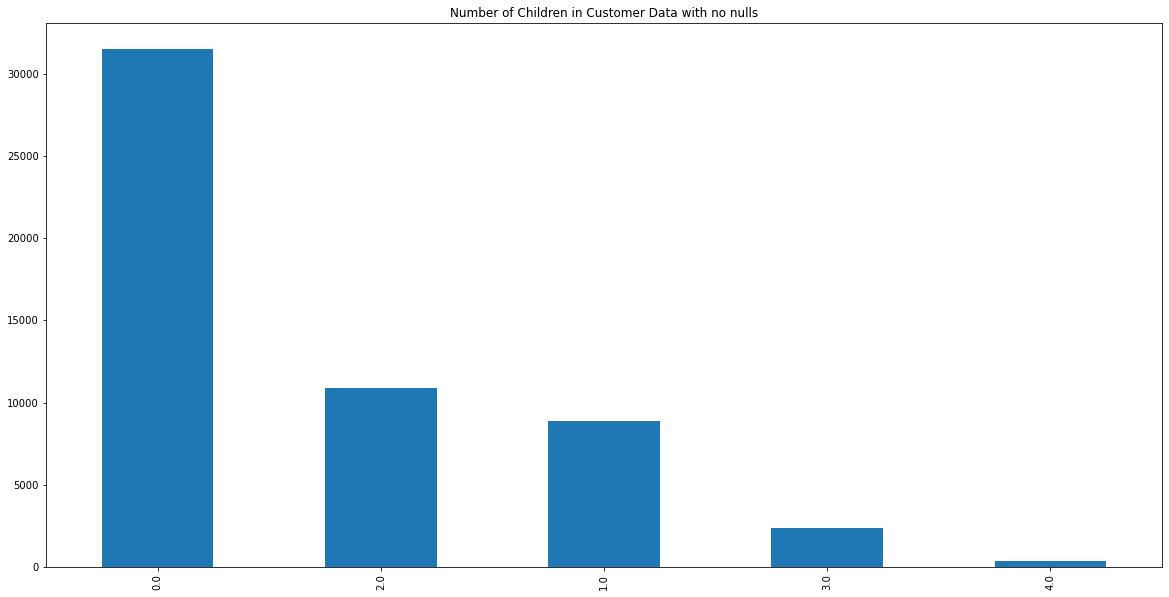

In [9]:
kids_df = df[df.Children.notnull()]
plt.figure(figsize = (20,10))
kids_df['Children'].value_counts().plot(kind = 'bar', title = "Number of Children in Customer Data with no nulls") 

In [10]:
kids_df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,1103084867,2013-04-15,800220505783,2,1.96,10,14,239,2,grocery food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
3,1103084867,2013-04-15,520423907421,2,0.58,10,14,239,2,grocery food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
4,1097579428,2013-03-29,520423907421,2,0.58,10,14,239,2,grocery food,pet,cat,9164001986624,52.0,Unknown,Married,3.0,2.0
5,1095925310,2013-03-23,520423907421,2,0.58,10,14,239,2,grocery food,pet,cat,9164001986624,52.0,Unknown,Married,3.0,2.0
6,1099543882,2013-04-04,520423907421,2,0.58,10,14,239,2,grocery food,pet,cat,9164001986624,52.0,Unknown,Married,3.0,2.0


In [11]:
has_kids_df = kids_df.loc[kids_df['Children'] > 0]
no_kids_df = kids_df.loc[kids_df['Children'] < 1]

print("Shape of dataframe with kids is: " + str(has_kids_df.shape))
print("Shape of dataframe with no kids is: " + str(no_kids_df.shape))

Shape of dataframe with kids is: (22470, 18)
Shape of dataframe with no kids is: (31529, 18)


In [12]:
res = no_kids_df.groupby(['CategoryBDescription', 'Children']).size()
res1 = has_kids_df.groupby(['CategoryBDescription']).size()

In [13]:
#res.plot(kind = 'bar')

### Category B

In [14]:
df2 = pd.DataFrame(res1).reset_index()
df2.rename(columns = {0: "SalesKids"}, inplace = True)

In [15]:
df3 = pd.DataFrame(res).reset_index()
df3.rename(columns = {0: "SalesNoKids"}, inplace = True)
comp = pd.merge(df2, df3, on = "CategoryBDescription")
comp.drop(columns = ['Children'], inplace = True)
comp.head()

,CategoryBDescription,SalesKids,SalesNoKids
0,babies clothing,3,4
1,bakery,387,517
2,bed and kitchen,2,5
3,books-paper-music-video,70,99
4,butchery,25,30


<AxesSubplot:title={'center':'Difference in number of CatB sales between customers with and without kids'}, xlabel='CategoryBDescription'>

<Figure size 1080x720 with 0 Axes>

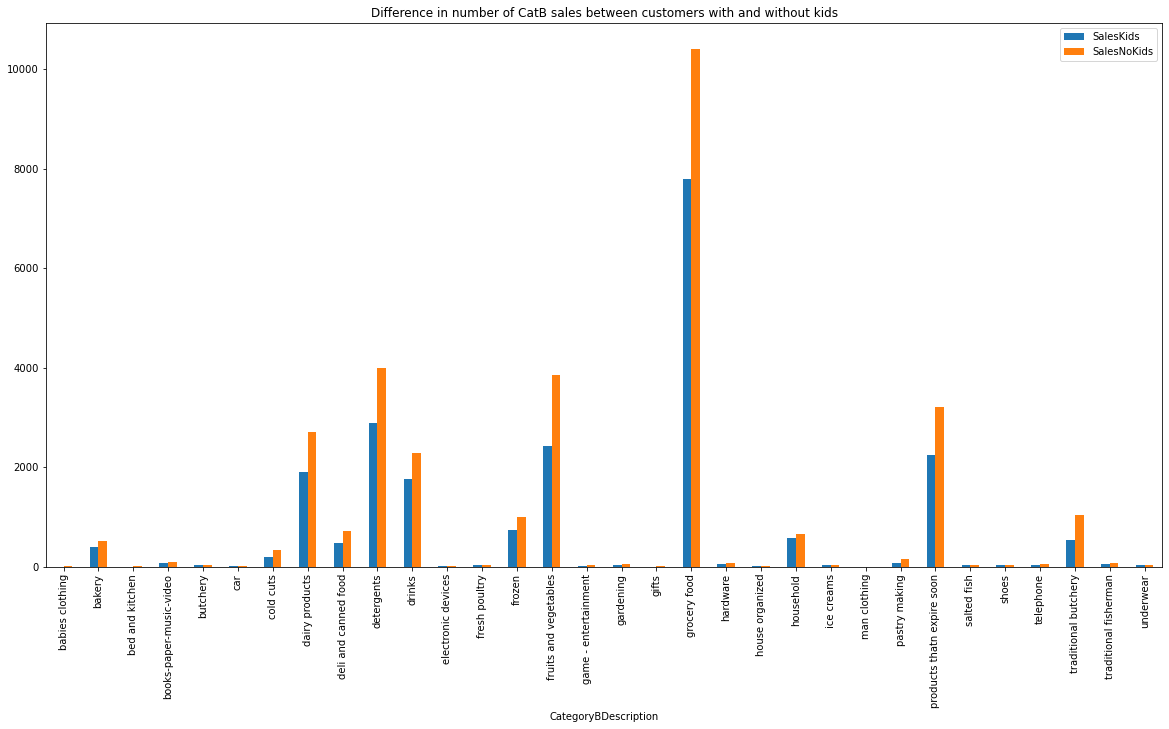

In [16]:
plt.figure(figsize = (15, 10))
plt.rcParams['figure.figsize'] = [20, 10]
comp.plot(x = 'CategoryBDescription', kind = 'bar', stacked = False, title = 'Difference in number of CatB sales between customers with and without kids')

In [17]:
df['CategoryCDescription'].value_counts()

fresh vegetables       10452
fresh milk              9908
beverages               7706
tisues/sanitary etc     5782
fresh fruits            4731
                       ...  
paint                      1
sport                      1
pants                      1
air time otenet            1
health and beauty          1
Name: CategoryCDescription, Length: 185, dtype: int64

### Category C

In [18]:
res11 = no_kids_df.groupby(['CategoryCDescription', 'Children']).size()
res12 = has_kids_df.groupby(['CategoryCDescription']).size()

In [19]:
df4 = pd.DataFrame(res11).reset_index()
df4.rename(columns = {0: "SalesKids"}, inplace = True)
df5 = pd.DataFrame(res12).reset_index()
df5.rename(columns = {0: "SalesNoKids"}, inplace = True)
comp1 = pd.merge(df4, df5, on = "CategoryCDescription")
comp1.drop(columns = ['Children'], inplace = True)
comp1.head()

,CategoryCDescription,SalesKids,SalesNoKids
0,air time cosmote,30,19
1,air time q,1,1
2,air time vodafone,18,12
3,air time wind,4,6
4,alcoholic beverages,16,10


In [20]:
comp1 = comp1.sort_values(['SalesKids', 'SalesNoKids'], ascending = [False, False])
comp1_plot = comp1.head(35)

<AxesSubplot:title={'center':'Difference in number of CatC sales between customers with and without kids'}, xlabel='CategoryCDescription'>

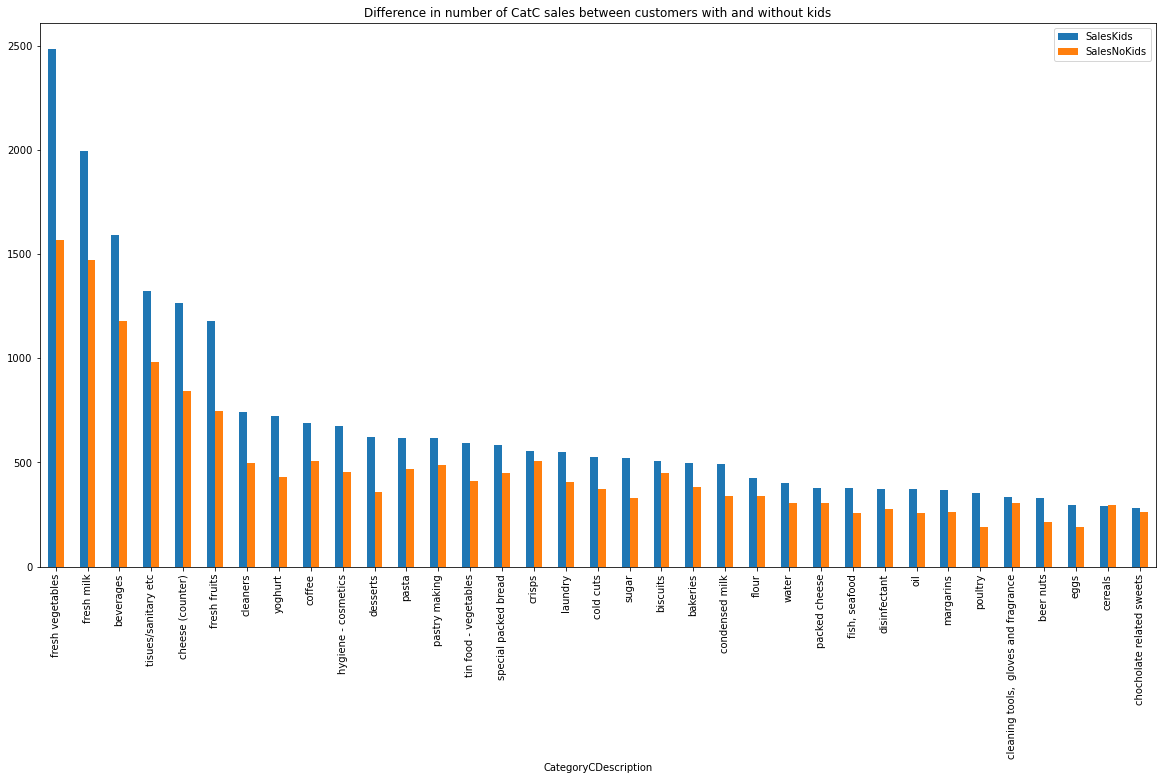

In [21]:
plt.rcParams['figure.figsize'] = [20, 10]
comp1_plot.plot(x = 'CategoryCDescription', kind = 'bar', stacked = False, title = 'Difference in number of CatC sales between customers with and without kids')

In [22]:
lst1 = []
nkids_vals = list(comp1['SalesNoKids'])
kids_vals = list(comp1['SalesKids'])
for i in range(len(nkids_vals)):
    x = kids_vals[i] - nkids_vals[i]
    lst1.append(x)

In [23]:
comp1['Difference'] = lst1

In [24]:
comp1 = comp1.sort_values(['Difference'], ascending = [False])

In [25]:
comp1 = comp1.head(30)
comp1.drop(columns = ['Difference'], inplace = True)

<AxesSubplot:title={'center':'Biggest Difference in number of CatC sales between customers with and without kids'}, xlabel='CategoryCDescription'>

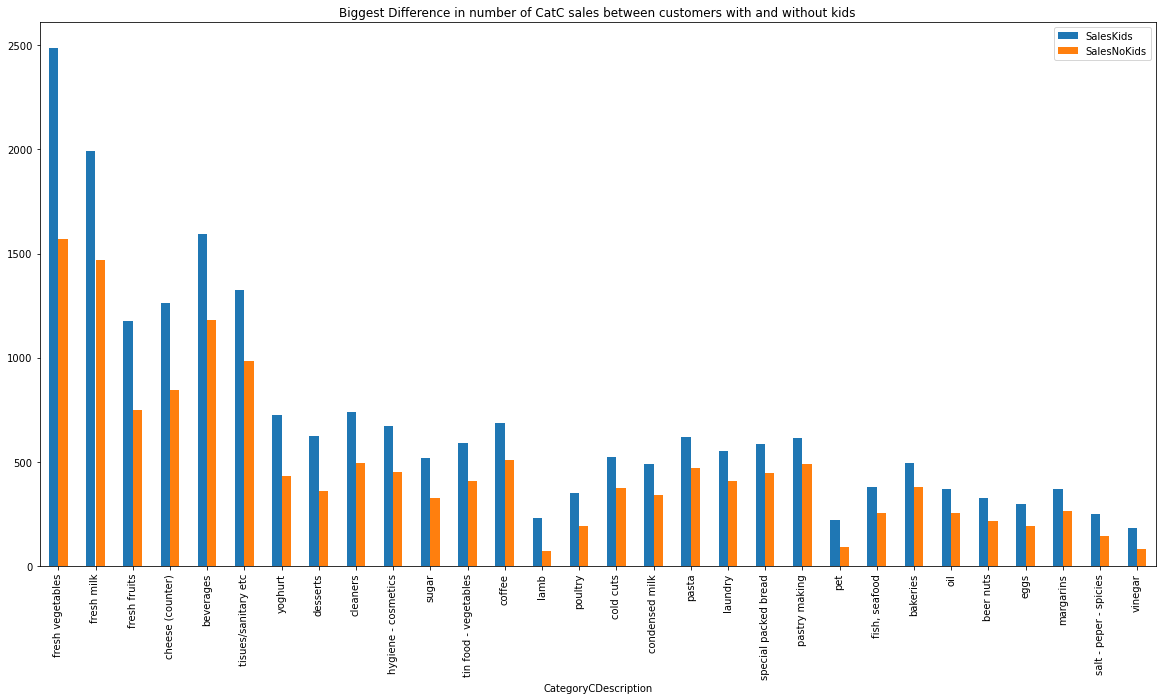

In [26]:
plt.rcParams['figure.figsize'] = [20, 10]
comp1.plot(x = 'CategoryCDescription', kind = 'bar', stacked = False, title = 'Biggest Difference in number of CatC sales between customers with and without kids')

### CategoryD

In [27]:
res21 = no_kids_df.groupby(['CategoryDDescription', 'Children']).size()
res22 = has_kids_df.groupby(['CategoryDDescription']).size()

df6 = pd.DataFrame(res21).reset_index()
df6.rename(columns = {0: "SalesKids"}, inplace = True)
df7 = pd.DataFrame(res22).reset_index()
df7.rename(columns = {0: "SalesNoKids"}, inplace = True)
comp2 = pd.merge(df6, df7, on = "CategoryDDescription")
comp2.drop(columns = ['Children'], inplace = True)
comp2.head()

,CategoryDDescription,SalesKids,SalesNoKids
0,adhesives,5,3
1,"adhesives, tapes, labels",2,1
2,adult,107,81
3,air fresheners,25,14
4,air time cosmote,30,19


In [28]:
comp2 = comp2.sort_values(['SalesKids', 'SalesNoKids'], ascending = [False, False])
comp2_plot = comp2.head(35)

<AxesSubplot:title={'center':'Difference in number of CatD sales between customers with and without kids'}, xlabel='CategoryDDescription'>

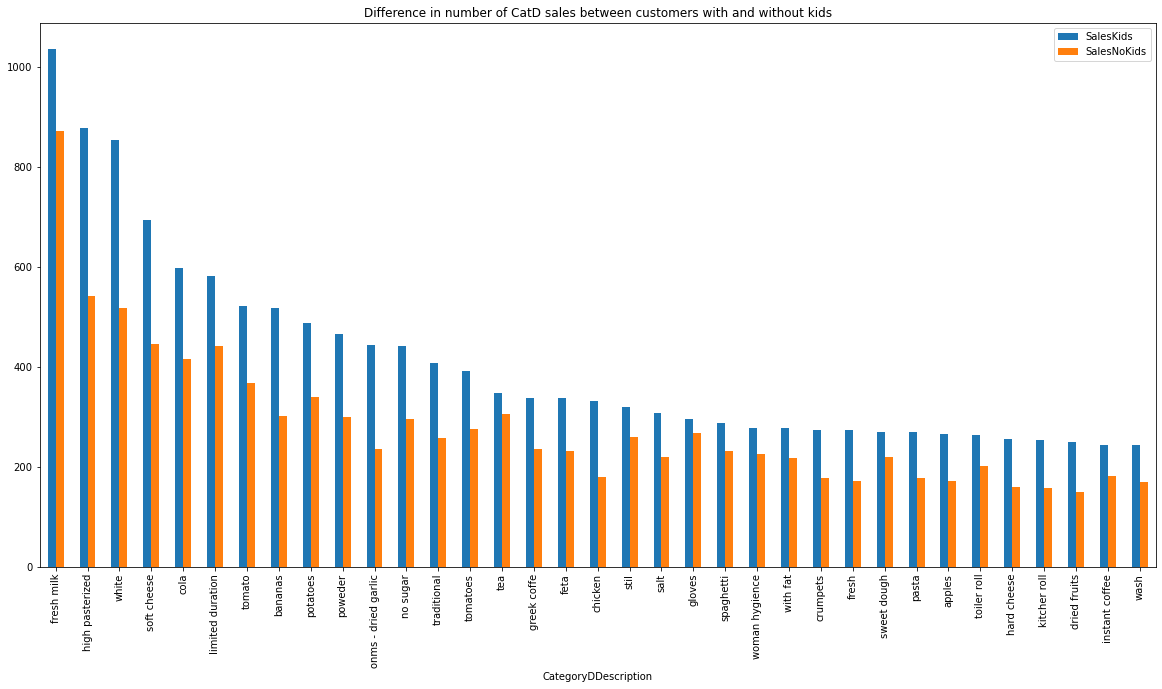

In [29]:
plt.rcParams['figure.figsize'] = [20, 10]
comp2_plot.plot(x = 'CategoryDDescription', kind = 'bar', stacked = False, title = 'Difference in number of CatD sales between customers with and without kids')

In [30]:
### Biggest Diffs
lst2 = []
nkids_vals = list(comp2['SalesNoKids'])
kids_vals = list(comp2['SalesKids'])
for i in range(len(nkids_vals)):
    x = kids_vals[i] - nkids_vals[i]
    lst2.append(x)

In [31]:
comp2['Difference'] = lst2
comp2 = comp2.sort_values(['Difference'], ascending = [False])

comp2 = comp2.head(35)
comp2

,CategoryDDescription,SalesKids,SalesNoKids,Difference
415,white,854,518,336
183,high pasterized,877,542,335
340,soft cheese,693,445,248
21,bananas,517,301,216
255,onms - dried garlic,443,236,207
88,cola,597,415,182
291,poweder,465,299,166
152,fresh milk,1035,871,164
385,tomato,521,368,153
68,chicken,331,179,152


<AxesSubplot:title={'center':'Biggest Difference in number of CatD sales between customers with and without kids'}, xlabel='CategoryDDescription'>

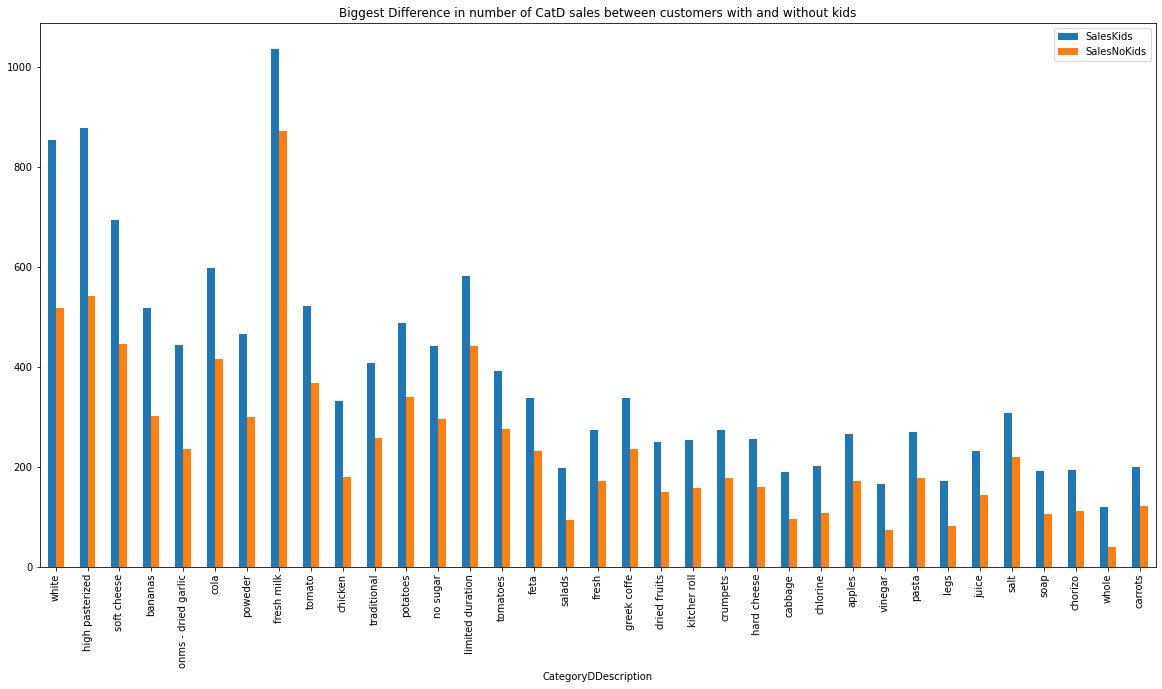

In [32]:
comp2.drop(columns = ['Difference'], inplace = True)

plt.rcParams['figure.figsize'] = [20, 10]
comp2.plot(x = 'CategoryDDescription', kind = 'bar', stacked = False, title = 'Biggest Difference in number of CatD sales between customers with and without kids')

### Time-Series Plot
Trying to uncover trends in buyer behaviour over the data's timeframe of 3 months. If there is an upward trend in a product's sales it might be worth considering marginally increasing the price for example or if sales are stagnating, promotions could be offered to promote the product to customers.

In [33]:
df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,1103084867,2013-04-15,800220505783,2,1.96,10,14,239,2,grocery food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
1,1098000980,2013-03-30,800220505783,2,1.96,10,14,239,2,grocery food,pet,cat,9160001242098,73.0,Male,NaN,3.0,NaN
2,1102258535,2013-04-12,800220505783,3,2.94,10,14,239,2,grocery food,pet,cat,9160001242098,73.0,Male,NaN,3.0,NaN
3,1103084867,2013-04-15,520423907421,2,0.58,10,14,239,2,grocery food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
4,1097579428,2013-03-29,520423907421,2,0.58,10,14,239,2,grocery food,pet,cat,9164001986624,52.0,Unknown,Married,3.0,2.0


In [34]:
#### Lets do a monthly breakdown
df_copy = df.copy()
df_copy['Date'] = df_copy['Date'].astype(str)
dates = list(df_copy['Date'])
yr = []
mth = []
for i in range(len(dates)):
    l = dates[i].split("-")
    yr.append(l[0])
    mth.append(l[1])

In [35]:
#yr
df_copy['Year'] = yr
df_copy['Month'] = mth

In [36]:
df_copy['Year'] = df_copy['Year'].astype(int)
df_copy['Year'].max()

2013

In [37]:
df_copy['Month'].value_counts()

04    73479
03    62378
05     6396
Name: Month, dtype: int64

In [38]:
res_dailysales = df.groupby(['CategoryBDescription', 'Date'])['Sum_Value'].sum()
res_dailysales

CategoryBDescription  Date      
babies clothing       2013-03-06     2.99
                      2013-03-07    11.19
                      2013-03-09     2.99
                      2013-03-19     8.21
                      2013-03-30     3.00
                                    ...  
underwear             2013-04-27    12.20
                      2013-04-29    33.20
                      2013-04-30    18.70
                      2013-05-01    35.00
                      2013-05-02    28.10
Name: Sum_Value, Length: 1295, dtype: float64

In [39]:
dffff = pd.DataFrame(res_dailysales)
dffff = dffff.reset_index()

#### Category B Time-Series Plot

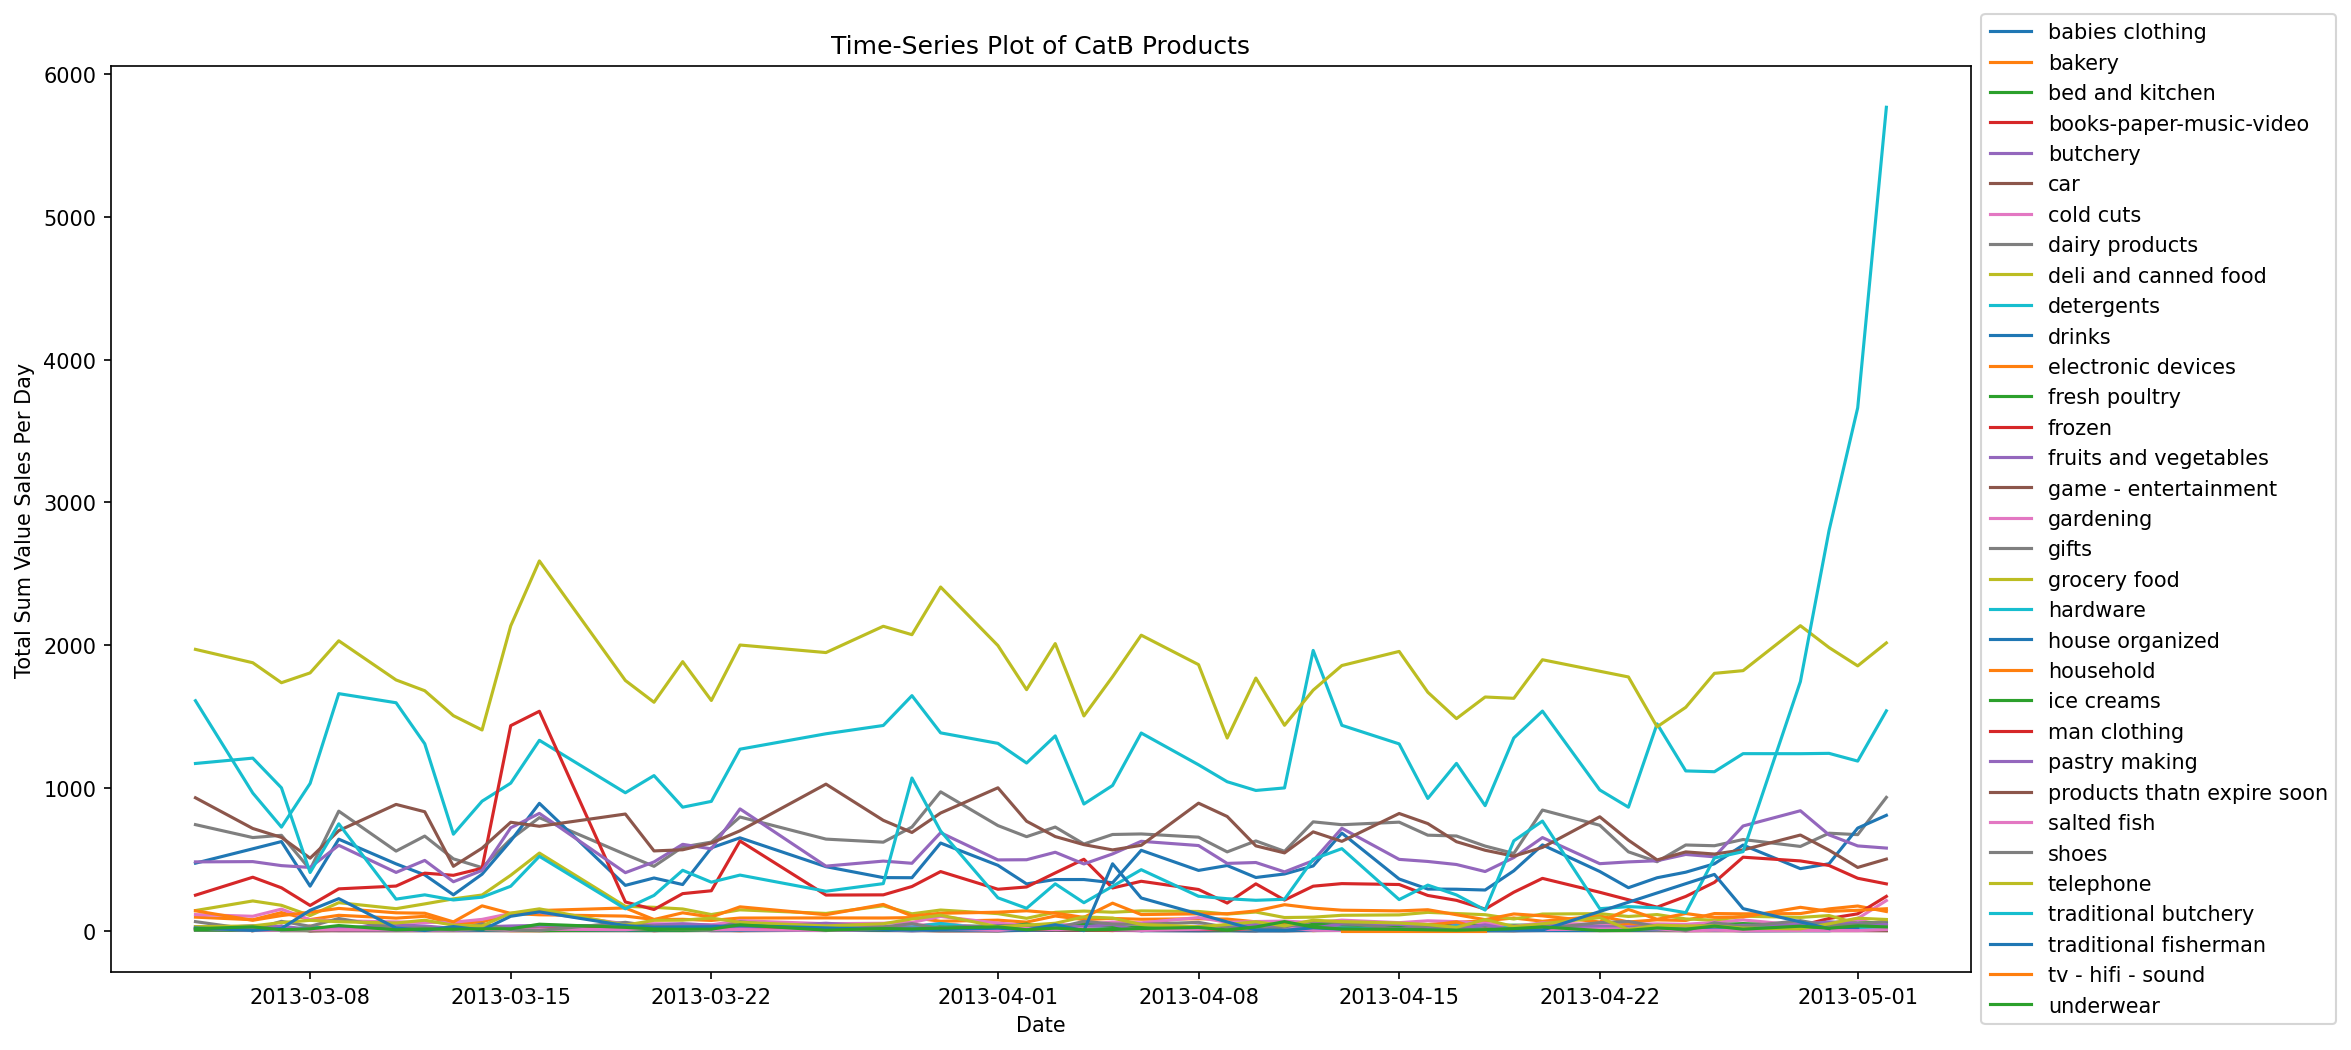

In [40]:
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
grpss = list(dffff['CategoryBDescription'].unique())
for i in range(len(grpss)):
    df_temp = dffff.loc[dffff['CategoryBDescription'] == grpss[i]]
    plt.plot(df_temp['Date'], df_temp['Sum_Value'], label = str(grpss[i]))

#adding title to the plot
plt.title('Time-Series Plot of CatB Products')
  
# adding Label to the x-axis
plt.xlabel('Date')
# add y label
plt.ylabel('Total Sum Value Sales Per Day')
# adding legend to the curve
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Idea 2
Products Near Expiry Analysis

In [41]:
df_expiry = df.loc[df['CategoryBDescription'] == 'products thatn expire soon']
df_expiry.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
3348,1099923930,2013-04-05,520423931236,1,2.25,30,21,1,2,products thatn expire soon,yoghurt,white,9164001986624,52.0,Unknown,Married,3.0,2.0
3349,1095925310,2013-03-23,520423931236,1,2.02,30,21,1,2,products thatn expire soon,yoghurt,white,9164001986624,52.0,Unknown,Married,3.0,2.0
3350,1103853518,2013-04-17,520423931236,2,3.60,30,21,1,2,products thatn expire soon,yoghurt,white,9164001986624,52.0,Unknown,Married,3.0,2.0
3351,1103082794,2013-04-15,520423931236,1,2.25,30,21,1,2,products thatn expire soon,yoghurt,white,9164001986624,52.0,Unknown,Married,3.0,2.0
3352,1107813996,2013-04-29,520423931236,1,2.25,30,21,1,2,products thatn expire soon,yoghurt,white,9162006322461,47.0,Male,NaN,1.0,0.0


In [42]:
df_expiry['CategoryCDescription'].value_counts()

fresh milk                       9908
yoghurt                          3006
children's products              1096
juices, nectar from fr fruits     751
desserts                          670
biological                         83
Name: CategoryCDescription, dtype: int64

In [43]:
df_expiry['CategoryDDescription'].value_counts()

fresh milk                   5102
high pasterized              4305
white                        2532
children yoghurt              539
fruit juice                   486
baby yoghurt                  379
helathy                       286
traditional sweets            272
fresh fruits 100%             265
frsh milk high pasterized     202
with coco                     186
children dessert              178
milk                          173
with fruits                   158
creams                        154
sweets                        136
creme caramel                  66
jelly                          42
mixed                          30
kis                            12
yoghurt                        11
Name: CategoryDDescription, dtype: int64

Quite similar types of products, perhaps too many of these products are being ordered and the company is losing potential revenue as a result.

### Let's do a time-series plot to see is there a consistent trend of nearly expired products being sold

If this is the case then this would suggest constant over-ordering is being done by the company and orders need to be scaled down of these specific products.

In [44]:
expiry_dailysales = df_expiry.groupby(['CategoryDDescription', 'Date'])['Sum_Units'].sum()
expiry_dailysales

CategoryDDescription  Date      
baby yoghurt          2013-03-04    11
                      2013-03-06    10
                      2013-03-07    12
                      2013-03-08     3
                      2013-03-09     6
                                    ..
yoghurt               2013-04-10     1
                      2013-04-15     2
                      2013-04-17     1
                      2013-04-22     1
                      2013-04-23     1
Name: Sum_Units, Length: 854, dtype: int64

In [45]:
expiry_dailysales1 = df_expiry.groupby(['CategoryDDescription'])['Sum_Units'].sum()
expiry_dailysales1 = expiry_dailysales1.sort_values(ascending = False)

### get top 10 expired CatD products in this time for better plot
expiry_dailysales1 = expiry_dailysales1[:10]
plots = pd.DataFrame(expiry_dailysales1).reset_index()
plt_names = list(plots['CategoryDDescription'])

In [46]:
# dataframe format
expired_df_catD = pd.DataFrame(expiry_dailysales)
expired_df_catD = expired_df_catD.reset_index()
## take only top 1 for better plot
expired_df_catD = expired_df_catD.loc[expired_df_catD['CategoryDDescription'].isin(plt_names)]

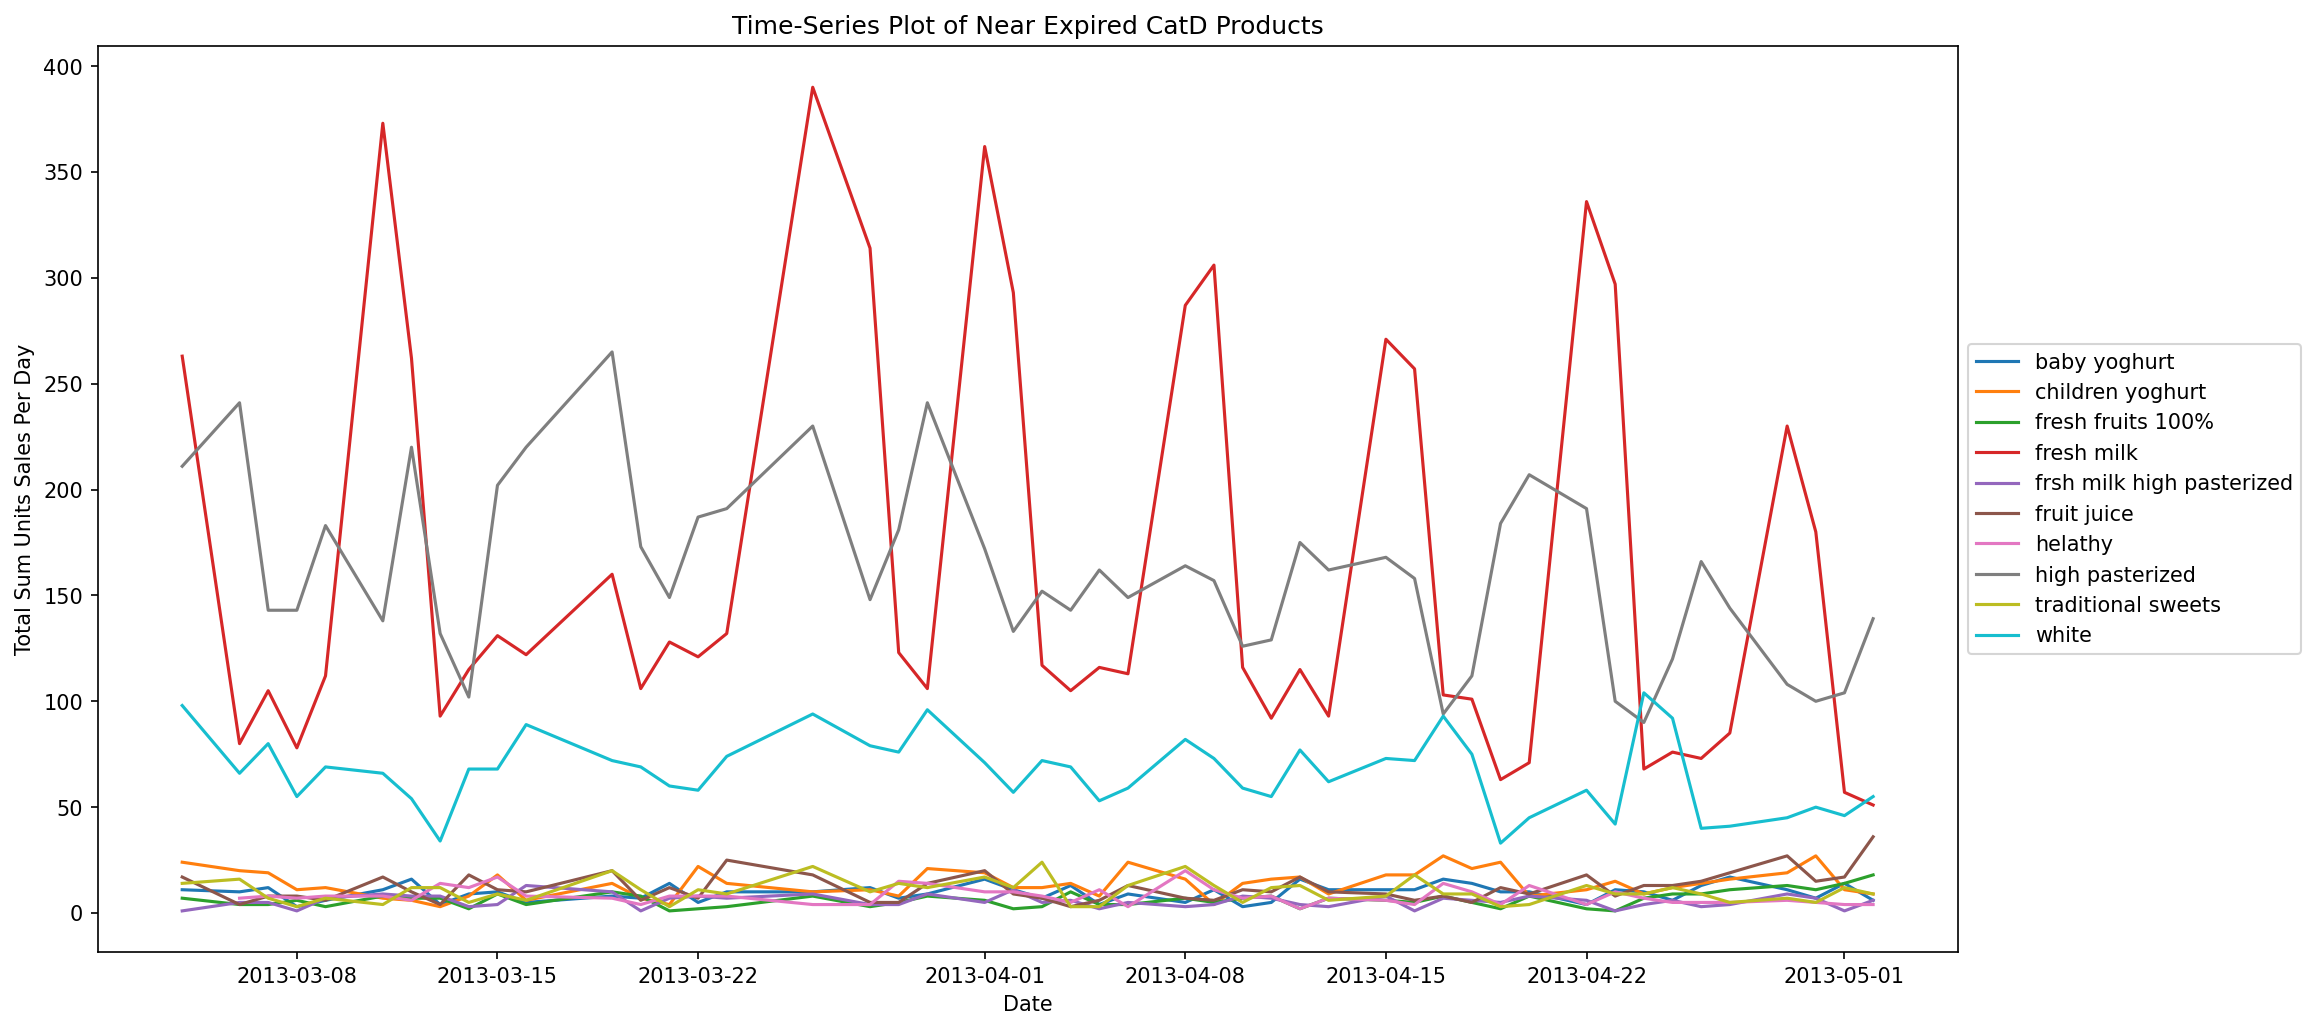

In [47]:
## now lets plot
plt.figure(figsize = (16, 8), dpi = 150)

grp_expire = list(expired_df_catD['CategoryDDescription'].unique())
for i in range(len(grp_expire)):
    #print(i)
    df_grp = expired_df_catD.loc[expired_df_catD['CategoryDDescription'] == grp_expire[i]]
    plt.plot(df_grp['Date'], df_grp['Sum_Units'], label = str(grp_expire[i]))

#adding title to the plot
plt.title('Time-Series Plot of Near Expired CatD Products')
  
# adding Label to the x-axis
plt.xlabel('Date')
# add y label
plt.ylabel('Total Sum Units Sales Per Day')
# adding legend to the curve
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Observations

It is interesting to note that "fresh milk", "high pasterized" and "white" have values much higher that the rest of the top 10 category D products. Milk in particular has a lot of peaks in the data so we will investigate a trend analysis of these 3 aforementioned groups to better see if they have consistency in being over ordered for example.

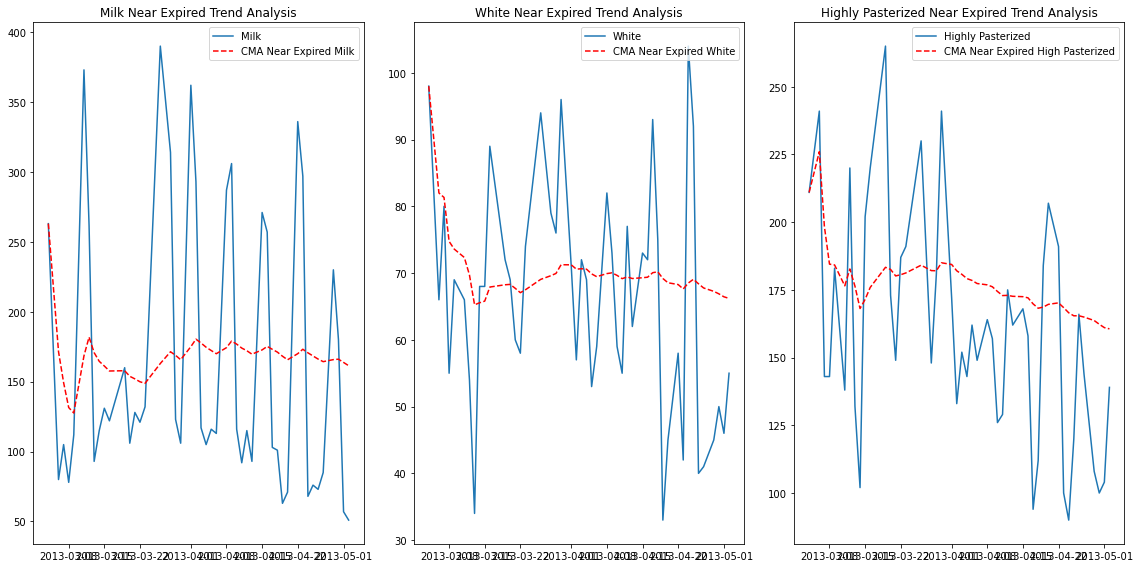

In [48]:
### subset first
milk = expired_df_catD.loc[expired_df_catD['CategoryDDescription'] == 'fresh milk']
### Culmative Moving Average (the unweighted mean of past values until the current time)
### this will give us an idea of the trend of near expired values
milk['CMA'] = milk.Sum_Units.expanding().mean()

white = expired_df_catD.loc[expired_df_catD['CategoryDDescription'] == 'white']
white['CMA'] = white.Sum_Units.expanding().mean()

highp = expired_df_catD.loc[expired_df_catD['CategoryDDescription'] == 'high pasterized']
highp['CMA'] = highp.Sum_Units.expanding().mean()

## now plot
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 8))
## plot 1 - milk
axes[0].plot(milk['Date'], milk['Sum_Units'], label = "Milk")
axes[0].plot(milk['Date'], milk['CMA'], color = "red", label = "CMA Near Expired Milk", linestyle = "dashed")
## plot 2 - white
axes[1].plot(white['Date'], white['Sum_Units'], label = "White")
axes[1].plot(white['Date'], white['CMA'], color = "red", label = "CMA Near Expired White", linestyle = "dashed")
## plot 3 - pasterized
axes[2].plot(highp['Date'], highp['Sum_Units'], label = "Highly Pasterized")
axes[2].plot(highp['Date'], highp['CMA'], color = "red", label = "CMA Near Expired High Pasterized", linestyle = "dashed")

### now add titles and legends
axes[0].title.set_text('Milk Near Expired Trend Analysis')
axes[0].legend(loc = "upper right")
axes[1].title.set_text('White Near Expired Trend Analysis')
axes[1].legend(loc = "upper right")
axes[2].title.set_text('Highly Pasterized Near Expired Trend Analysis')
axes[2].legend(loc = "upper right")
#fig.suptitle("Subplots showing Daily Sum Units Sold of Near Expiration CatD Products", fontsize = 15)
fig.tight_layout()

From our 3 plots above we can see that with our CMA values there is a fairly steady trend of daily nearly expired products belonging to the milk, highly pasterized and white products. As per the respective dotted lines, there is approximately a trend of 150 units for nearly expired milk, 70 for white and 175 for highly pasterized products. Due to the ambiguous nature of "white" and "highly pasterized" (these could include a whole plethora of products so only having a handful of expiring units per product is fine it may be advised to the company to leave these products. However, the sheer volume of fresh milks nearly expiring is worth noting. These most likely cover a very select group of brands and as they are near expiration they are most likely reduced in price and may only break even or lose money on these items. From this milk graph, we would advise the company to investigate the quantities it orders milk in and to see could they potentially scale back on these to boost profits and allow for more space for other products too.

In [49]:
df.loc[df['CategoryBDescription'] == 'products thatn expire soon']

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
3348,1099923930,2013-04-05,520423931236,1,2.25,30,21,1,2,products thatn expire soon,yoghurt,white,9164001986624,52.0,Unknown,Married,3.0,2.0
3349,1095925310,2013-03-23,520423931236,1,2.02,30,21,1,2,products thatn expire soon,yoghurt,white,9164001986624,52.0,Unknown,Married,3.0,2.0
3350,1103853518,2013-04-17,520423931236,2,3.60,30,21,1,2,products thatn expire soon,yoghurt,white,9164001986624,52.0,Unknown,Married,3.0,2.0
3351,1103082794,2013-04-15,520423931236,1,2.25,30,21,1,2,products thatn expire soon,yoghurt,white,9164001986624,52.0,Unknown,Married,3.0,2.0
3352,1107813996,2013-04-29,520423931236,1,2.25,30,21,1,2,products thatn expire soon,yoghurt,white,9162006322461,47.0,Male,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142081,1090792214,2013-03-07,520108333410,1,2.35,30,21,8,4,products thatn expire soon,fresh milk,fresh milk,0,NaN,NaN,NaN,NaN,NaN
142088,1093110347,2013-03-14,520423915405,1,0.26,30,21,3,2,products thatn expire soon,children's products,children dessert,0,NaN,NaN,NaN,NaN,NaN
142162,1108242638,2013-04-30,520318300012,3,2.85,30,21,2,3,products thatn expire soon,desserts,jelly,0,NaN,NaN,NaN,NaN,NaN
142168,1094397283,2013-03-19,520108333103,1,2.12,30,21,3,3,products thatn expire soon,children's products,children yoghurt,0,NaN,NaN,NaN,NaN,NaN


In [50]:
tt = df.loc[df['CategoryDDescription'].str.contains("fresh milk")]
tt['CategoryBDescription'].value_counts()

products thatn expire soon    5102
Name: CategoryBDescription, dtype: int64

In [51]:
tt['Barcode'].nunique()

27

In [52]:
tt1 = tt.loc[tt['Sum_Units'] == 1]
tt1['Barcode'].nunique()

27

In [53]:
## take mode as most common price
unit_price = tt1.groupby(['Barcode'])['Sum_Value'].agg(pd.Series.mode).to_frame()
unit_price = unit_price.reset_index()
unit_price.head()

,Barcode,Sum_Value
0,520103750011,0.70
1,520103750012,0.99
2,520103750019,2.25
3,520103750026,0.70
4,520103750028,1.18


In [54]:
unit_dict = dict(zip(unit_price['Barcode'], unit_price['Sum_Value']))
#unit_dict

In [55]:
### check what sales were below normal selling price
indexes = []
barss = list(tt['Barcode'])
#print(barss)
sumss = list(tt['Sum_Units'])
saless = list(tt['Sum_Value'])
for i in range(len(barss)):
    x = unit_dict.get(barss[i])
    if sumss[i] == 1:
        #print(x)
        if saless[i] < x:
            indexes.append(i)
        else:
            continue
    else:
        #print("Nothing")
        div = saless[i] / sumss[i]
        if div < x:
            indexes.append(i)
        else:
            continue

In [56]:
len(indexes)

752

In [57]:
below_mode = tt.iloc[indexes]

In [58]:
below_mode['Sum_Units'].sum()

1133

In [59]:
tt['Sum_Units'].sum()

7748

In [60]:
less_sold = below_mode['Sum_Units'].sum() / tt['Sum_Units'].sum()
print("Percentage of Fresh Milk Transactions with diminished sales price is: " + str(less_sold))

Percentage of Fresh Milk Transactions with diminished sales price is: 0.14623128549303047


### Near Expiry - Highest Percentage Sold at Less Normal Price

Here we will check for products that are sold at at least a 10% discount on normal rate. We make the following assumptions:

- the normal rate for products is the maximum sum_value they are sold for for one of the specific item in question.
- 10% discount entails selling off products to recoup some money back instead of nothing.
- that no promotions took place on these products or that no mistakes were made with regards pricing in the timeframe of the data.

In [61]:
df_expiry = df.loc[df['CategoryBDescription'] == 'products thatn expire soon']

In [62]:
tt1 = df_expiry.loc[df_expiry['Sum_Units'] == 1]
tt1['Barcode'].nunique()

413

In [63]:
unit_price1 = tt1.groupby(['Barcode'])['Sum_Value'].agg(pd.Series.max).to_frame()
unit_price1 = unit_price1.reset_index()
unit_price1.head()

,Barcode,Sum_Value
0,302329021693,1.50
1,303349021306,1.76
2,324541464041,1.19
3,324541465298,1.99
4,327019002313,1.25


In [64]:
unit_dict1 = dict(zip(unit_price1['Barcode'], unit_price1['Sum_Value']))

In [65]:
df_expiry['Barcode'].nunique()

423

In [66]:
values_taken = list(unit_price1['Barcode'])
barss1 = list(df_expiry['Barcode'])
sumss1 = list(df_expiry['Sum_Units'])
saless1 = list(df_expiry['Sum_Value'])
d1 = {}
for i in range(len(barss1)):
    #print(i)
    if barss1[i] not in unit_dict1:
        v = saless1[i] / sumss1[i]
        d1[barss1[i]] = v
    else:
        continue

In [67]:
def Merge(dict1, dict2):
    return(dict2.update(dict1))

Merge(d1, unit_dict1)
print(len(unit_dict1))

423


In [68]:
### check what sales were below normal selling price
indexes1 = []
barss1 = list(df_expiry['Barcode'])
#print(barss)
sumss1 = list(df_expiry['Sum_Units'])
saless1 = list(df_expiry['Sum_Value'])
# len(barss1)
for i in range(len(barss1)):
    x = unit_dict1.get(barss1[i])
    #print(i)
    if sumss1[i] == 1:
## get within 10% of price
        ten_percent = x * 0.1
        ten_percent = round(ten_percent, 2)
# if sale price + 10% of normal price is less than unit price mark as discounted
        if saless1[i] + ten_percent < x:
            indexes1.append(i)
        else:
            continue
    else:
        #print("Nothing")
        div = saless1[i] / sumss1[i]
        #print(div)
        ten_percent = x * 0.1
        ten_percent = round(ten_percent, 2)
        #print(ten_percent)
        if div + ten_percent < x:
            #o = div + ten_percent
            #print(o)
            #print(x)
            indexes1.append(i)
        else:
            continue

In [69]:
#unit_dict1[520423931236]

In [70]:
df_expiry.iloc[[2]]

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
3350,1103853518,2013-04-17,520423931236,2,3.6,30,21,1,2,products thatn expire soon,yoghurt,white,9164001986624,52.0,Unknown,Married,3.0,2.0


In [71]:
below_mode1 = df_expiry.iloc[indexes1]
below_mode1.shape

(2721, 18)

In [72]:
df_expiry.shape

(15514, 18)

In [73]:
sum1 = df_expiry['Sum_Units'].sum()
sum2 = below_mode1['Sum_Units'].sum()
print("Number of products sold in near expiry data is: " + str(sum1))
print("Number of discounted products sold in near expiry data is: " + str(sum2))

Number of products sold in near expiry data is: 23139
Number of discounted products sold in near expiry data is: 4804


In [74]:
grouped1 = df_expiry.groupby(['Barcode'])['Sum_Units'].sum().to_frame()
grouped_discount = below_mode1.groupby(['Barcode'])['Sum_Units'].sum().to_frame()

In [75]:
grouped_discount = grouped_discount.reset_index()
grouped1 = grouped1.reset_index()

In [76]:
grouped1.head()

,Barcode,Sum_Units
0,302329021693,6
1,303349021306,30
2,324541464041,35
3,324541465298,2
4,327019002313,36


In [77]:
grouped_discount.rename(columns = {'Sum_Units': 'SumSoldDiscounted'}, inplace = True)

In [78]:
res_df = pd.merge(grouped1, grouped_discount, on ='Barcode')

In [79]:
res_df = res_df.sort_values(by = ['Sum_Units'], ascending = False)

In [80]:
## take products sold at least 40 of
res_df = res_df.loc[res_df['Sum_Units'] > 40]

In [81]:
lst3 = []
lst_comp1 = list(res_df['Sum_Units'])
lst_comp2 = list(res_df['SumSoldDiscounted'])
for i in range(len(lst_comp2)):
    h = lst_comp2[i] / lst_comp1[i]
    h = h * 100
    lst3.append(h)

In [82]:
res_df['PercentageDiscounted'] = lst3
res_df.head()

,Barcode,Sum_Units,SumSoldDiscounted,PercentageDiscounted
51,520103750012,1953,1224,62.672811
158,520423932240,723,16,2.213001
65,520103750446,636,604,94.968553
176,520685106250,560,13,2.321429
53,520103750028,533,273,51.219512


In [83]:
res_df = res_df.sort_values(by = ['PercentageDiscounted'], ascending = False)
res_df.head()

,Barcode,Sum_Units,SumSoldDiscounted,PercentageDiscounted
65,520103750446,636,604,94.968553
91,520108332109,393,361,91.857506
66,520103750447,331,300,90.634441
92,520108332397,254,214,84.251969
103,520108333409,238,189,79.411765


In [84]:
test_add = list(res_df['Barcode'])
l = []
barss1 = list(df_expiry['Barcode'])
catD_expiry = list(df_expiry['CategoryDDescription'])
for i in range(len(barss1)):
    if barss1[i] in test_add:
        if catD_expiry[i] not in l:
            l.append(catD_expiry[i])
        else:
            continue
    else:
        continue

In [85]:
len(l)

10

In [86]:
g = pd.DataFrame(res_df['Barcode'])
g.head(1)

,Barcode
65,520103750446


In [87]:
g1 = df[['Barcode', 'CategoryDDescription']]
lllll = pd.merge(g, g1, on ='Barcode')
lllll = lllll.drop_duplicates(['Barcode','CategoryDDescription'])
lllll

,Barcode,CategoryDDescription
0,520103750446,fresh milk
314,520108332109,fresh milk
511,520103750447,fresh milk
705,520108332397,fresh milk
827,520108333409,fresh milk
...,...,...
7968,520108333363,high pasterized
8019,520685103687,high pasterized
8081,520217800000,high pasterized
8227,520423932241,fresh milk


In [88]:
res_df1 = pd.merge(res_df, lllll, on = 'Barcode')
res_df1.head()

,Barcode,Sum_Units,SumSoldDiscounted,PercentageDiscounted,CategoryDDescription
0,520103750446,636,604,94.968553,fresh milk
1,520108332109,393,361,91.857506,fresh milk
2,520103750447,331,300,90.634441,fresh milk
3,520108332397,254,214,84.251969,fresh milk
4,520108333409,238,189,79.411765,fresh milk


In [89]:
df_expiry.loc[df_expiry['Barcode'] == 520103750446].head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
10216,1105431026,2013-04-22,520103750446,4,3.96,30,21,8,4,products thatn expire soon,fresh milk,fresh milk,9164005689668,35.0,Female,NaN,3.0,2.0
10217,1098439074,2013-04-01,520103750446,2,1.98,30,21,8,4,products thatn expire soon,fresh milk,fresh milk,9164005689668,35.0,Female,NaN,3.0,2.0
10218,1103473629,2013-04-16,520103750446,3,2.97,30,21,8,4,products thatn expire soon,fresh milk,fresh milk,9160001242210,61.0,Female,Single (Alone),2.0,1.0
10219,1105798499,2013-04-23,520103750446,1,0.99,30,21,8,4,products thatn expire soon,fresh milk,fresh milk,9164005688708,33.0,Female,NaN,2.0,1.0
10220,1104596525,2013-04-19,520103750446,1,1.48,30,21,8,4,products thatn expire soon,fresh milk,fresh milk,9164013043940,74.0,Male,NaN,2.0,0.0


In [90]:
res_df1['Barcode'] = res_df1['Barcode'].astype(str)
res_df1["DescriptionBarcode"] = res_df1["Barcode"] + res_df1["CategoryDDescription"]

In [91]:
res_df_plot = res_df1.head(10)

Text(0.5, 1.0, 'Most % of Products At At Least 10% Discounted Sales')

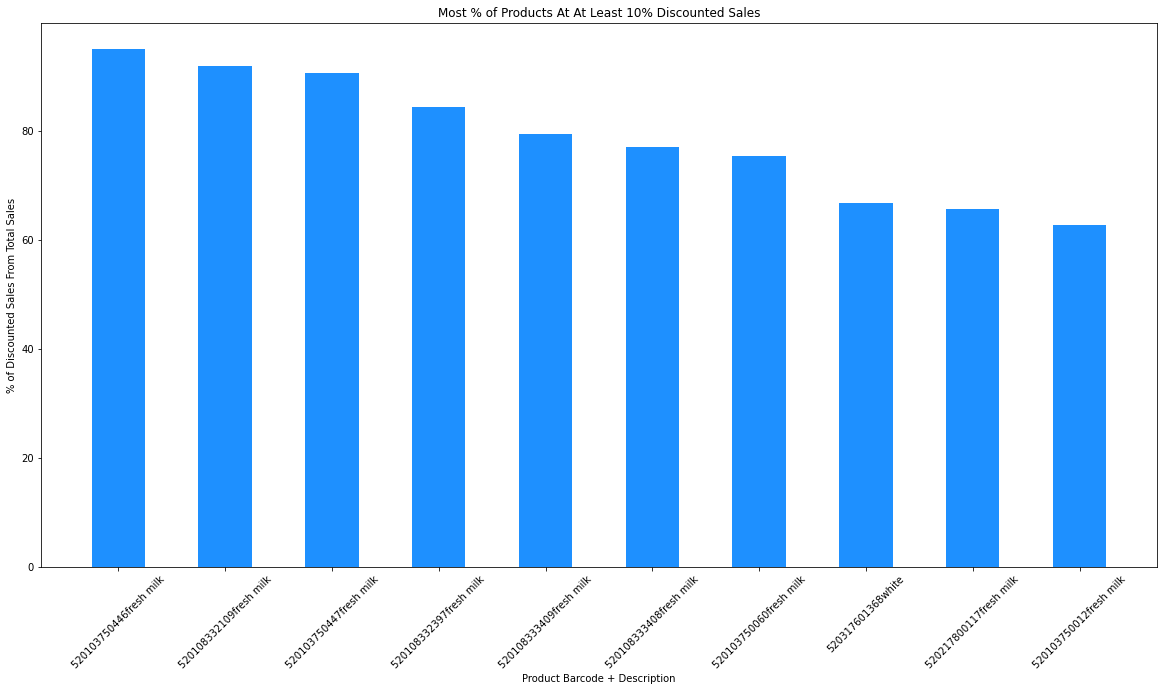

In [92]:
plt.xticks(rotation = 45)
plt.bar(res_df_plot['DescriptionBarcode'], res_df_plot['PercentageDiscounted'], color = 'dodgerblue',
        width = 0.5)
plt.xlabel("Product Barcode + Description")
plt.ylabel("% of Discounted Sales From Total Sales")
plt.title('Most % of Products At At Least 10% Discounted Sales')

## Findings Evaluation
We see there is essentially only fresh milk products being sold at discounted prices in large volumes. Due to the limited time range of the data (basically only two months worth of data as only two days in May used) it would be unreasonable to suggest these prices fluctuated massively in this time. Instead we believe that the company is failing to maximize their revenue by ordering excessive quantities of milk. It is assumed that milk does not have a large upmark here, hence these discounted sales would undo the revenue generated by full sale price items. We recommend that the company **carefully evaluates it's ordering policy of products with short timespans like so and adjust the order quantities accordingly**.